In [ ]:
# Лабораторная “Построение моделей” ФИО: Михайлова Ксения

In [14]:
import random
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

In [15]:
#1 Загрузить данные из папки Data Folder

In [32]:
df = pd.read_csv('flag.csv')

In [17]:
#2. Провести описательный анализ предложенных данных

In [33]:
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
name          194 non-null object
landmass      194 non-null int64
zone          194 non-null int64
area          194 non-null int64
population    194 non-null int64
language      194 non-null int64
religion      194 non-null int64
bars          194 non-null int64
stripes       194 non-null int64
colours       194 non-null int64
red           194 non-null int64
green         194 non-null int64
blue          194 non-null int64
gold          194 non-null int64
white         194 non-null int64
black         194 non-null int64
orange        194 non-null int64
mainhue       194 non-null object
circles       194 non-null int64
crosses       194 non-null int64
saltires      194 non-null int64
quarters      194 non-null int64
sunstars      194 non-null int64
crescent      194 non-null int64
triangle      194 non-null int64
icon          194 non-null int64
animate       194 non-null int64
te

In [35]:
df.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
#3 Предложить стратегию по работе с категориальными переменными

In [37]:
cat_feat = list(df.dtypes[df.dtypes == object].index)

In [38]:
df['topleft'].unique()

array(['black', 'red', 'green', 'blue', 'white', 'orange', 'gold'],
      dtype=object)

In [39]:
df['botright'].unique()

array(['green', 'red', 'white', 'black', 'blue', 'gold', 'orange',
       'brown'], dtype=object)

In [40]:
df['mainhue'].unique()

array(['green', 'red', 'blue', 'gold', 'white', 'orange', 'black',
       'brown'], dtype=object)

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [43]:
df = MultiColumnLabelEncoder(columns = cat_feat).fit_transform(df)

In [44]:
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,0,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,0,4
1,1,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,5,6
2,2,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,3,7
3,3,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,1,6
4,4,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,1,6


In [ ]:
#4 Провести углубленный анализ данных (корреляции переменных, визуализация взаимосвязей)

In [45]:
corr = df.corr()
corr

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
name,1.000000,0.170270,-0.087289,-0.006473,-0.026453,0.137082,0.050569,-0.025418,0.097415,0.050962,...,-0.029187,0.069763,0.047556,0.066265,0.066614,-0.001165,-0.080039,-0.058889,0.056674,9.340343e-03
landmass,0.170270,1.000000,-0.615759,0.013279,0.105940,0.496400,0.325073,-0.139290,-0.063375,-0.062856,...,-0.003429,-0.004537,-0.034843,0.168438,-0.033154,0.030359,-0.118856,-0.110743,0.112511,-3.784420e-02
zone,-0.087289,-0.615759,1.000000,-0.025431,-0.124111,-0.618387,-0.320537,0.085446,0.002359,0.173567,...,0.179667,0.153300,0.121754,-0.159272,0.060416,-0.048692,0.106034,0.037602,-0.020102,-3.110113e-02
area,-0.006473,0.013279,-0.025431,1.000000,0.519030,-0.027869,0.087941,0.001243,0.028454,-0.162227,...,-0.025492,-0.001968,0.340572,-0.005049,-0.075366,0.026593,-0.051539,0.024423,0.038940,8.279745e-02
population,-0.026453,0.105940,-0.124111,0.519030,1.000000,0.062804,0.172731,-0.041392,0.030100,-0.115052,...,-0.059061,-0.041349,0.191377,-0.015544,-0.078156,0.017966,-0.082259,-0.025194,0.040267,1.151955e-01
language,0.137082,0.496400,-0.618387,-0.027869,0.062804,1.000000,0.422315,-0.049862,0.105409,-0.197883,...,-0.296106,-0.220535,-0.126241,0.193375,-0.064845,0.028336,-0.133756,-0.082977,-0.075339,5.818476e-02
religion,0.050569,0.325073,-0.320537,0.087941,0.172731,0.422315,1.000000,-0.060000,0.103222,-0.017720,...,-0.133373,-0.135713,-0.075081,0.053145,0.056868,0.055714,-0.002741,-0.055158,0.031511,2.303077e-02
bars,-0.025418,-0.139290,0.085446,0.001243,-0.041392,-0.049862,-0.060000,1.000000,-0.273371,-0.064574,...,-0.140070,-0.150604,-0.114667,0.021743,-0.132973,-0.002598,0.016260,0.067709,-0.172786,1.284444e-01
stripes,0.097415,-0.063375,0.002359,0.028454,0.030100,0.105409,0.103222,-0.273371,1.000000,0.038278,...,-0.190735,0.091941,0.215486,-0.010242,-0.005719,-0.107426,-0.157922,-0.111564,-0.220581,-6.311488e-02
colours,0.050962,-0.062856,0.173567,-0.162227,-0.115052,-0.197883,-0.017720,-0.064574,0.038278,1.000000,...,0.378810,0.187861,0.031008,-0.173644,0.143252,0.505614,0.544576,0.398483,0.060931,-1.495223e-01


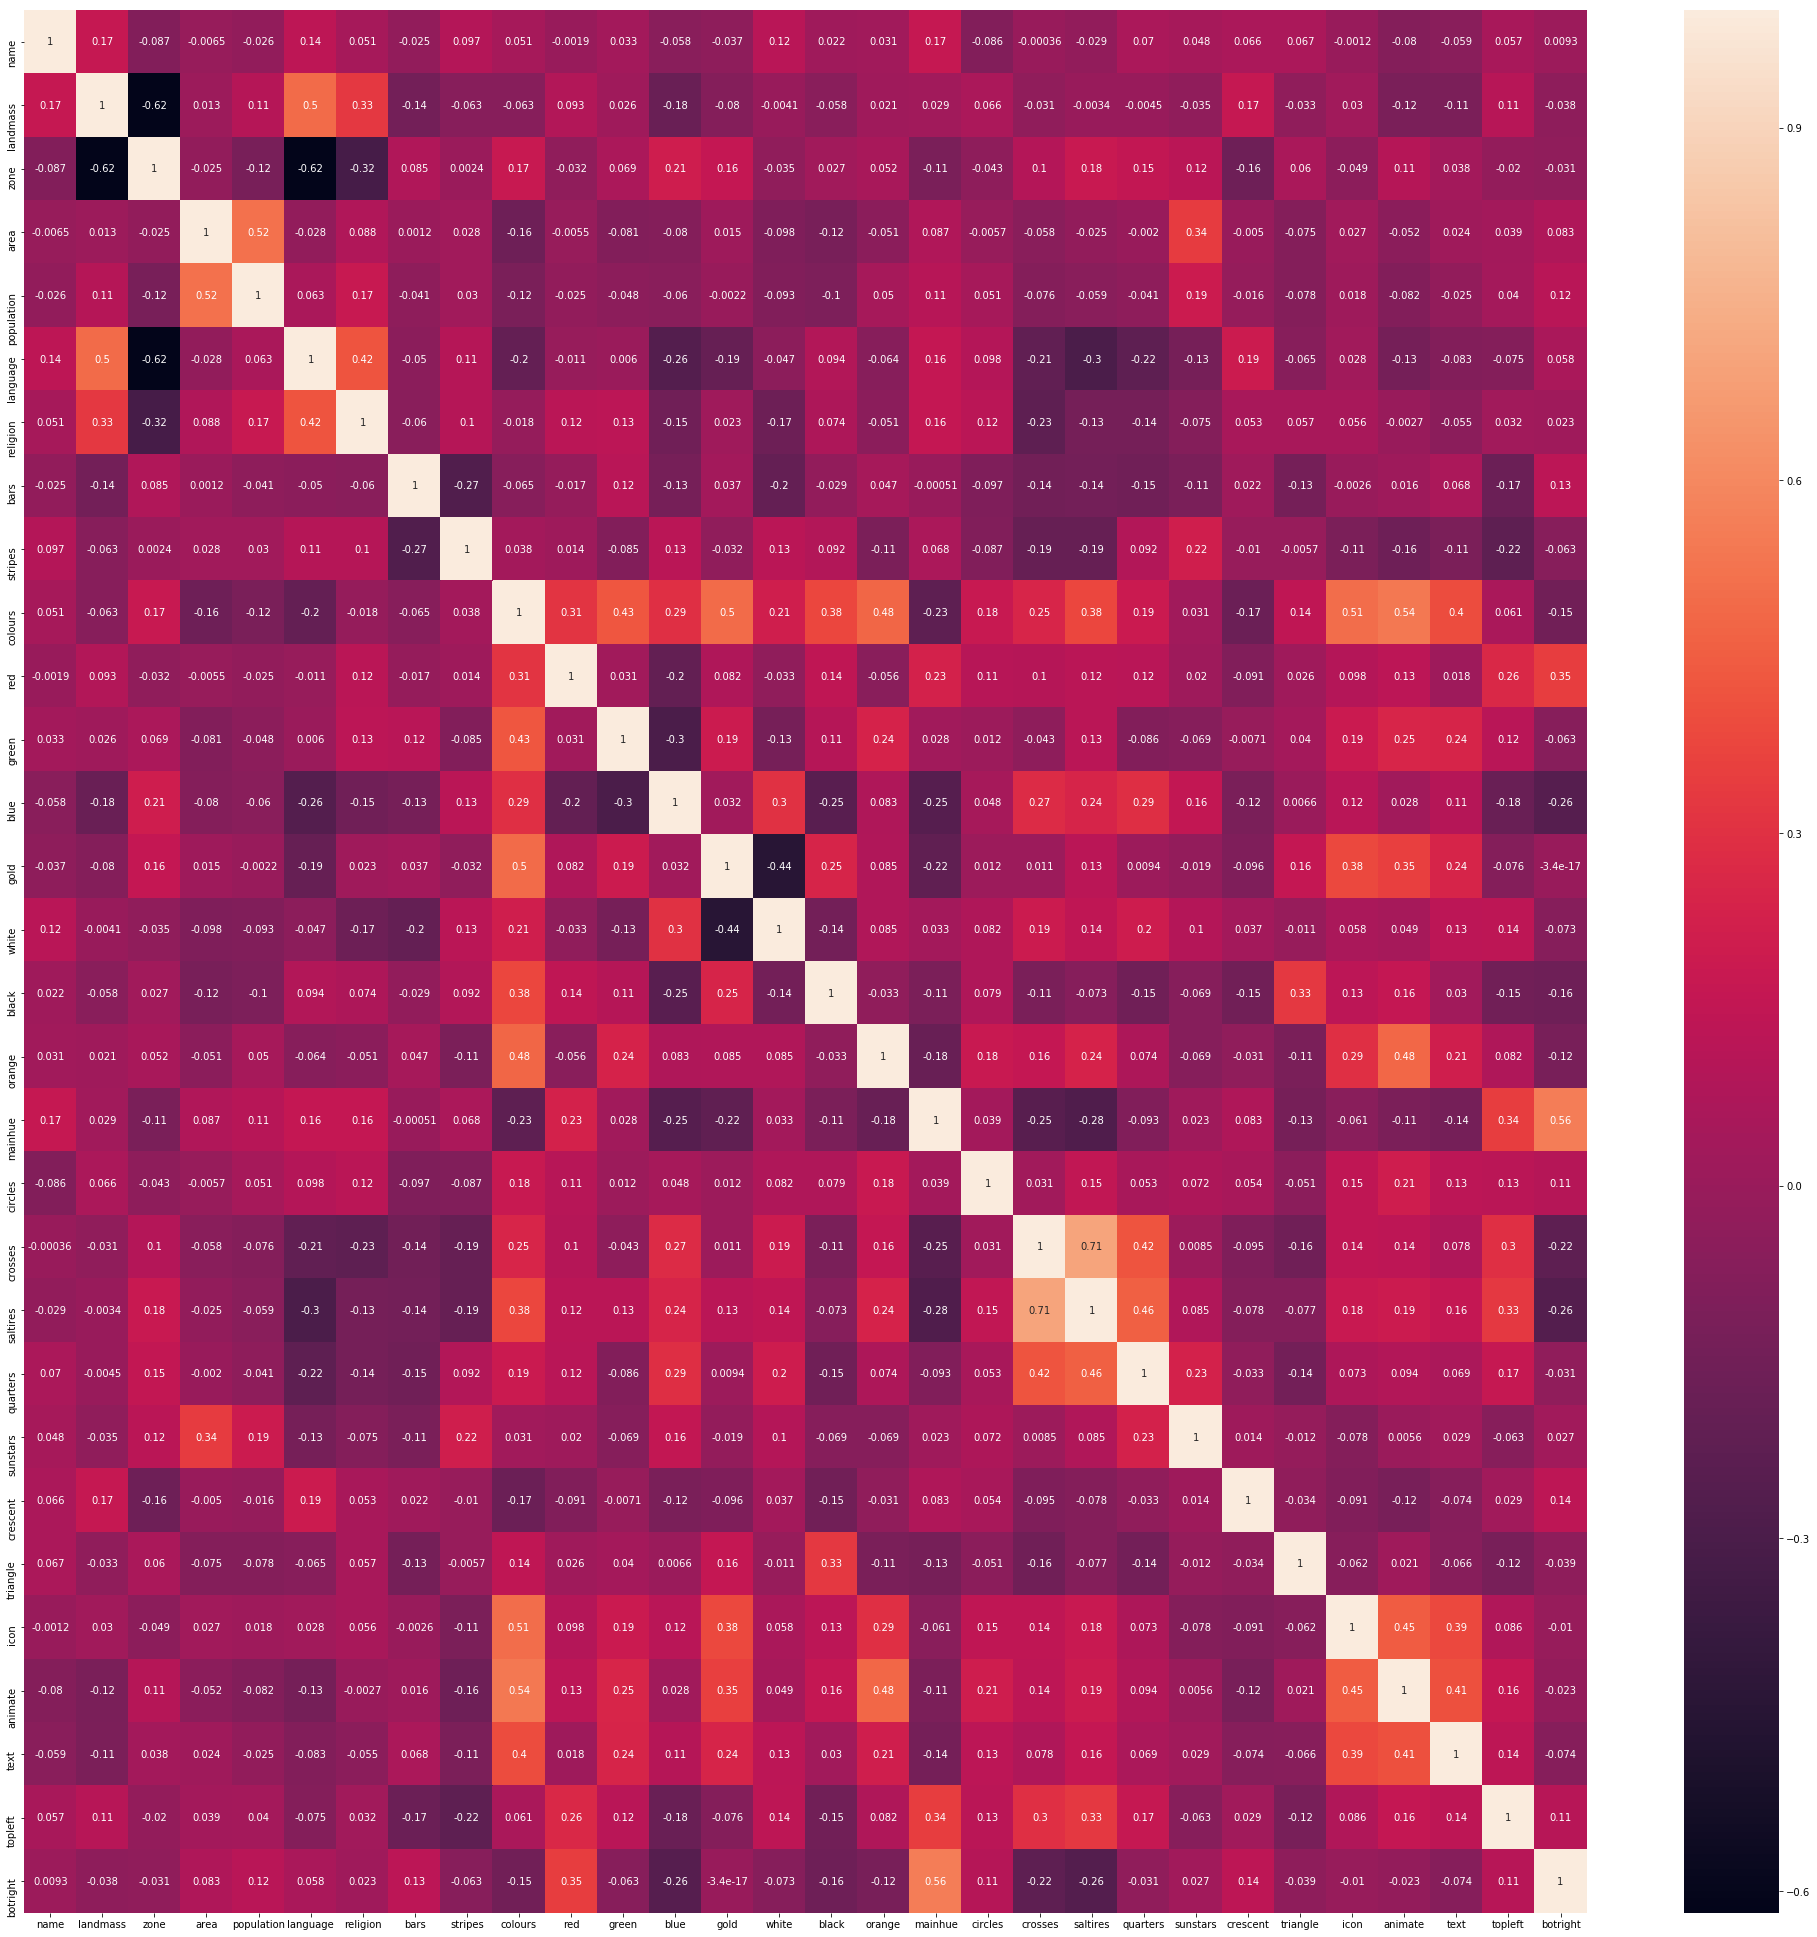

In [46]:
fig, ax = plt.subplots(figsize=(35,35))
sns.heatmap(corr, ax=ax, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
#5 Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты)

In [49]:
target = 'religion'

In [50]:
y = df[target]

In [51]:
X = df.drop(columns = target )

In [53]:
X = X.drop(columns = ['name'] )

In [ ]:
#Уменьшение размерности

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [59]:
X_pca

array([[-5.21944125e+01, -6.09935177e+00],
       [-6.71329615e+02, -5.48435114e+00],
       [ 1.68747248e+03, -4.03897265e+01],
       [-7.00389876e+02, -7.87845236e+00],
       [-7.00389682e+02, -7.85685995e+00],
       [ 5.46462576e+02, -2.82832536e+01],
       [-7.00389433e+02, -7.88619238e+00],
       [-7.00388827e+02, -7.88071458e+00],
       [ 2.07655308e+03, -4.10043796e+01],
       [ 2.07655368e+03, -4.10041065e+01],
       [ 6.98808056e+03, -1.62093131e+02],
       [-6.16233328e+02, -1.70228588e+00],
       [-6.81394688e+02, -8.31965841e+00],
       [-6.99389453e+02, -7.85412021e+00],
       [-5.55443946e+02,  7.89791316e+01],
       [-7.00390155e+02, -7.90490304e+00],
       [-6.69177205e+02,  1.45764673e+00],
       [-6.77395626e+02, -8.39633151e+00],
       [-5.87350145e+02, -7.35176742e+00],
       [-7.00389449e+02, -7.87959133e+00],
       [-6.53379091e+02, -7.86180828e+00],
       [ 3.98476456e+02, -2.60557817e+01],
       [-1.00513786e+02, -2.00555960e+01],
       [ 7.

In [ ]:
#Увеличение размерности

In [68]:
X_d = pd.get_dummies(X, columns = ['landmass','language','colours','topleft','botright',])


In [ ]:
# По Feature Importances

In [71]:
X2 = X[['landmass','language']]

In [72]:
X_d2 = pd.get_dummies(X2, columns = ['landmass','language'])

In [ ]:
#6 Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты)

In [ ]:
# Не разобралась

In [ ]:
#7 Сделать кросс-валидацию данных с использованием подхода K-fold (n_folds=3)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [54]:
X.head()

,landmass,zone,area,population,language,bars,stripes,colours,red,green,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,5,1,648,16,10,0,3,5,1,1,...,0,0,1,0,0,1,0,0,0,4
1,3,1,29,3,6,0,0,3,1,0,...,0,0,1,0,0,0,1,0,5,6
2,4,1,2388,20,8,2,0,3,1,1,...,0,0,1,1,0,0,0,0,3,7
3,6,3,0,0,1,0,0,5,1,0,...,0,0,0,0,1,1,1,0,1,6
4,3,1,0,0,6,3,0,3,1,0,...,0,0,0,0,0,0,0,0,1,6


In [55]:
knn = KNeighborsClassifier(n_neighbors=3)

In [57]:
scores = cross_val_score(knn, X, y, cv=3)
scores

array([0.41791045, 0.34375   , 0.3968254 ])

In [60]:
scores_pca = cross_val_score(knn, X_pca, y, cv=3)
scores_pca

array([0.40298507, 0.34375   , 0.38095238])

In [69]:
scores_d = cross_val_score(knn, X_d, y, cv=3)
scores_d

array([0.41791045, 0.390625  , 0.36507937])

In [74]:
scores_d2 = cross_val_score(knn, X_d2, y, cv=3)
scores_d2

array([0.70149254, 0.46875   , 0.6984127 ])

In [ ]:
#8 Решить задачу мультиклассовой классификации и предсказать религию страны (religion) по деталям ее флага

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [77]:
forest_params = {
    'n_estimators': [5, 10, 20, 40],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 5, 7, 9, None],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_d2, y)

In [79]:
forest = RandomForestClassifier()
grid_forest = GridSearchCV(forest, forest_params, scoring='accuracy', cv=10, n_jobs=-1)
grid_forest.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [5, 10, 20, 40], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 3, 5, 7, 9, None], 'min_samples_leaf': [1, 2, 4, 8, 16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [80]:
print(grid_forest.best_params_)
print(grid_forest.best_score_)
print(grid_forest.best_estimator_)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 10}
0.6827586206896552
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [90]:
param_dist_knn = { "n_neighbors": [1, 3, 5, 7, 9],
                   "p": [1, 2],
                   "weights": ['uniform', 'distance'],
                    "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'], 
                    "n_jobs": [-1]}

In [92]:
knn = KNeighborsClassifier(metric='minkowski')
grid_knn = GridSearchCV(knn, param_dist_knn, scoring='accuracy', cv=10)
grid_knn.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9], 'p': [1, 2], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [93]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)
print(grid_knn.best_estimator_)

{'algorithm': 'brute', 'n_jobs': -1, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.7034482758620689
KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=1,
           weights='distance')


In [ ]:
#9 Рассчитать Feature Importances для переменных модели

In [65]:
from sklearn.tree import DecisionTreeClassifier

([<matplotlib.axis.YTick at 0x1a1f7f2ba8>,
 <a list of 28 Text yticklabel objects>)

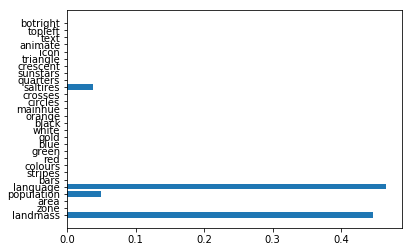

In [67]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X.columns)),X.columns)

In [ ]:
#10 Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [83]:
y_pred = grid_forest.best_estimator_.predict(X_test)

In [96]:
y_pred_knn = grid_knn.best_estimator_.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6530612244897959

In [98]:
accuracy_score(y_test, y_pred_knn)

0.6530612244897959

In [86]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred, average='macro')) 

print(f1_score(y_test, y_pred, average='micro'))  

print(f1_score(y_test, y_pred, average='weighted'))  

print(f1_score(y_test, y_pred, average=None))

0.4616911764705882
0.6530612244897959
0.6470348139255702
[0.6        0.72       0.75       0.4        0.         0.82352941
 0.4        0.        ]


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [100]:
print(f1_score(y_test, y_pred_knn, average='macro')) 

print(f1_score(y_test, y_pred_knn, average='micro'))  

print(f1_score(y_test, y_pred_knn, average='weighted'))  

print(f1_score(y_test, y_pred_knn, average=None))

0.4699708758061161
0.6530612244897959
0.6412422926316355
[0.66666667 0.69565217 0.72727273 0.53333333 0.         0.73684211
 0.4        0.        ]


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [88]:
from sklearn.metrics import precision_score

print(precision_score(y_test, y_pred, average='macro'))  

print(precision_score(y_test, y_pred, average='micro'))  

print(precision_score(y_test, y_pred, average='weighted'))

print(precision_score(y_test, y_pred, average=None))  

0.5393793706293706
0.6530612244897959
0.722420436706151
[0.75       0.69230769 0.9        1.         0.         0.7
 0.27272727 0.        ]


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [101]:
print(precision_score(y_test, y_pred_knn, average='macro'))  

print(precision_score(y_test, y_pred_knn, average='micro'))  

print(precision_score(y_test, y_pred_knn, average='weighted'))

print(precision_score(y_test, y_pred_knn, average=None))  

0.5426136363636365
0.6530612244897959
0.7401051329622759
[0.66666667 0.72727273 1.         0.36363636 0.         0.58333333
 1.         0.        ]


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [87]:
from sklearn.metrics import recall_score

print(recall_score(y_test, y_pred, average='macro'))  

print(recall_score(y_test, y_pred, average='micro'))  

print(recall_score(y_test, y_pred, average='weighted'))  

print(recall_score(y_test, y_pred, average=None))

0.48660714285714285
0.6530612244897959
0.6530612244897959
[0.5        0.75       0.64285714 0.25       0.         1.
 0.75       0.        ]


In [102]:
print(recall_score(y_test, y_pred_knn, average='macro'))  

print(recall_score(y_test, y_pred_knn, average='micro'))  

print(recall_score(y_test, y_pred_knn, average='weighted'))  

print(recall_score(y_test, y_pred_knn, average=None))

0.5193452380952381
0.6530612244897959
0.6530612244897959
[0.66666667 0.66666667 0.57142857 1.         0.         1.
 0.25       0.        ]


In [ ]:
#11 Построить Confusion Matrix для ваших результатов

In [81]:
from sklearn.metrics import confusion_matrix

In [84]:
confusion_matrix(y_test, y_pred)

array([[3, 3, 0, 0, 0, 0, 0, 0],
       [1, 9, 1, 0, 0, 1, 0, 0],
       [0, 0, 9, 0, 0, 2, 3, 0],
       [0, 0, 0, 1, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 7, 0, 0],
       [0, 1, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 1, 0]])

In [103]:
confusion_matrix(y_test, y_pred_knn)

array([[4, 2, 0, 0, 0, 0, 0, 0],
       [2, 8, 0, 0, 0, 2, 0, 0],
       [0, 0, 8, 3, 0, 3, 0, 0],
       [0, 0, 0, 4, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 7, 0, 0],
       [0, 1, 0, 2, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0]])